In [7]:
import csv
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib .pyplot as plt

In [8]:
g_open = [[1396.71]] #open value of today of google
r_open = [[0.20]] #open value of today of ripple

In [9]:
# Reading dataset of google stocks
dataset1 = pd.read_csv("C:/Users/zizo/Desktop/GOOG.csv")
dataset1 = dataset1.dropna()
X1=dataset1.iloc[: , 1:2].values
y1=dataset1.iloc[: , 2].values

In [10]:
# Reading dataset of Ripple stocks
dataset2 = pd.read_csv("C:/Users/zizo/Desktop/XRP-USD.csv")
dataset2 = dataset2.dropna()
X2=dataset2.iloc[: , 1:2].values
y2=dataset2.iloc[: , 2].values

In [11]:
#Splitting the data into test and train for random forest regression
X_train1,X_test1,y_train1,y_test1 = train_test_split(X1,y1, test_size=0.15, random_state=0)  #for google data
X_train2,X_test2,y_train2,y_test2 = train_test_split(X2,y2, test_size=0.35, random_state=0)  #for ripple data

In [12]:
#random forest regressor for google
regressor1 = RandomForestRegressor(n_estimators = 140, random_state = 0)
regressor1.fit(X_train1, y_train1)
y_pred1 = regressor1.predict(X_test1)
Y_predicted1 = regressor1.predict(g_open)
print("High predicted for today of Google using Random Forest is:",Y_predicted1)
rms1 = sqrt(mean_squared_error(y_test1, y_pred1))
print("Root Mean squared error for Google's stock is:",rms1)
print("---------------------------------------------------------------------------") 

High predicted for today of Google using Random Forest is: [1411.68354036]
Root Mean squared error for Google's stock is: 13.985342299097793
---------------------------------------------------------------------------


In [13]:
#random forest regressor for ripple
regressor2 = RandomForestRegressor(n_estimators = 140, random_state = 0)
regressor2.fit(X_train2, y_train2)
y_pred2 = regressor2.predict(X_test2)
Y_predicted2 = regressor2.predict(r_open)
print("High predicted for today of Ripple using Random Forest is:",Y_predicted2)
rms2 = sqrt(mean_squared_error(y_test2, y_pred2))
print("Root Mean squared error for ripple's stock is:",rms2)

High predicted for today of Ripple using Random Forest is: [0.20228698]
Root Mean squared error for ripple's stock is: 0.009213839063553376


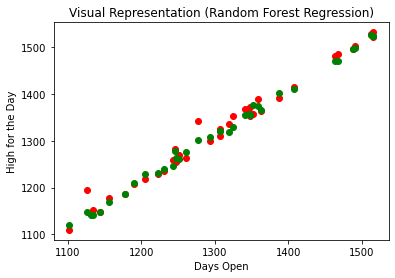

In [14]:
# Visualising the Random Forest Regression results of google
X_grid1 = np.arange(min(X_test1), max(X_test1), 10)
X_grid1= X_grid1.reshape((len(X_grid1), 1))
plt.scatter(X_test1, y_test1, color = 'red')
plt.scatter(X_test1,y_pred1,color='green')
plt.title('Visual Representation (Random Forest Regression)')
plt.xlabel('Days Open')
plt.ylabel('High for the Day')
plt.show()

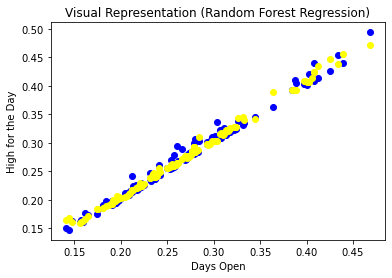

In [15]:
# Visualising the Random Forest Regression results of ripple
X_grid2 = np.arange(min(X_test2), max(X_test2), 10)
X_grid2 = X_grid2.reshape((len(X_grid2), 1))
plt.scatter(X_test2, y_test2, color = 'blue')
plt.scatter(X_test2,y_pred2,color='yellow')
plt.title('Visual Representation (Random Forest Regression)')
plt.xlabel('Days Open')
plt.ylabel('High for the Day')
plt.show()